In [91]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: HeadCT/005000.jpeg      
  inflating: HeadCT/005001.jpeg      
  inflating: HeadCT/005002.jpeg      
  inflating: HeadCT/005003.jpeg      
  inflating: HeadCT/005004.jpeg      
  inflating: HeadCT/005005.jpeg      
  inflating: HeadCT/005006.jpeg      
  inflating: HeadCT/005007.jpeg      
  inflating: HeadCT/005008.jpeg      
  inflating: HeadCT/005009.jpeg      
  inflating: HeadCT/005010.jpeg      
  inflating: HeadCT/005011.jpeg      
  inflating: HeadCT/005012.jpeg      
  inflating: HeadCT/005013.jpeg      
  inflating: HeadCT/005014.jpeg      
  inflating: HeadCT/005015.jpeg      
  inflating: HeadCT/005016.jpeg      
  inflating: HeadCT/005017.jpeg      
  inflating: HeadCT/005018.jpeg      
  inflating: HeadCT/005019.jpeg      
  inflating: HeadCT/005020.jpeg      
  inflating: HeadCT/005021.jpeg      
  inflating: HeadCT/005022.jpeg      
  inflating: HeadCT/005023.jpeg      
  inflating: HeadCT/005024.jpeg      

In [9]:
data = os.listdir('dataset')
print(data)
print("Types of classes labels found: ", len(data))

['ChestCT', 'CXR', 'BreastMRI', 'HeadCT', 'Hand', 'AbdomenCT']
Types of classes labels found:  6


In [12]:
classes = []

for item in data:
 all_classes = os.listdir('dataset' + '/' +item+'/')
 for room in all_classes:
    classes.append((item, str('dataset' + '/' +item) + '/' + room))

In [13]:
classes

[('ChestCT', 'dataset/ChestCT/005088.jpeg'),
 ('ChestCT', 'dataset/ChestCT/005455.jpeg'),
 ('ChestCT', 'dataset/ChestCT/000145.jpeg'),
 ('ChestCT', 'dataset/ChestCT/004704.jpeg'),
 ('ChestCT', 'dataset/ChestCT/002636.jpeg'),
 ('ChestCT', 'dataset/ChestCT/005107.jpeg'),
 ('ChestCT', 'dataset/ChestCT/002503.jpeg'),
 ('ChestCT', 'dataset/ChestCT/001833.jpeg'),
 ('ChestCT', 'dataset/ChestCT/004656.jpeg'),
 ('ChestCT', 'dataset/ChestCT/008457.jpeg'),
 ('ChestCT', 'dataset/ChestCT/009300.jpeg'),
 ('ChestCT', 'dataset/ChestCT/005366.jpeg'),
 ('ChestCT', 'dataset/ChestCT/003949.jpeg'),
 ('ChestCT', 'dataset/ChestCT/005666.jpeg'),
 ('ChestCT', 'dataset/ChestCT/002049.jpeg'),
 ('ChestCT', 'dataset/ChestCT/003867.jpeg'),
 ('ChestCT', 'dataset/ChestCT/007554.jpeg'),
 ('ChestCT', 'dataset/ChestCT/006944.jpeg'),
 ('ChestCT', 'dataset/ChestCT/005797.jpeg'),
 ('ChestCT', 'dataset/ChestCT/009067.jpeg'),
 ('ChestCT', 'dataset/ChestCT/004740.jpeg'),
 ('ChestCT', 'dataset/ChestCT/004092.jpeg'),
 ('ChestCT

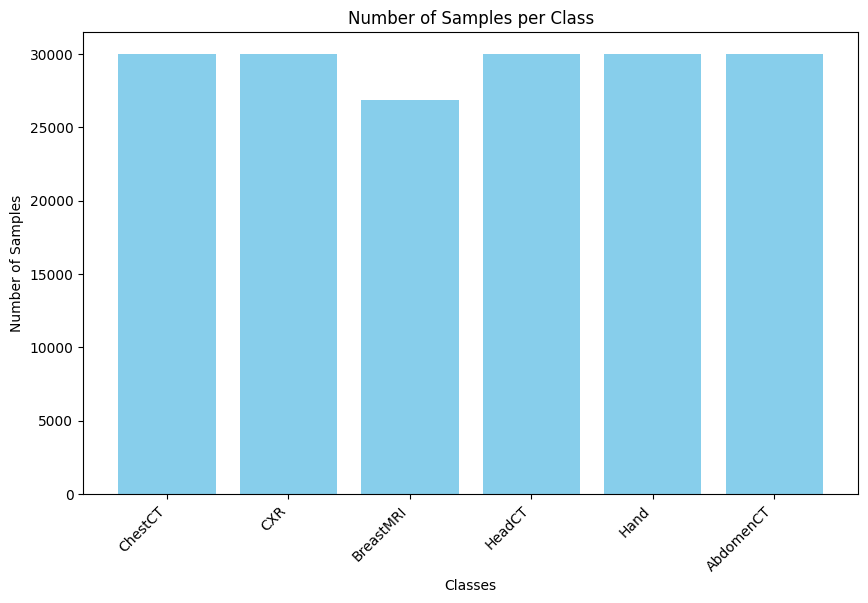

In [167]:
data_dir = 'dataset'
for item in os.listdir(data_dir):
    all_classes = os.listdir(os.path.join(data_dir, item))
    for room in all_classes:
        classes.append((item, os.path.join(data_dir, item, room)))

class_counts = {}
for class_name, _ in classes:
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

class_names, counts = zip(*class_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
df = pd.DataFrame(data=classes, columns=['Labels', 'image'])
df.head()

,Labels,image
0,ChestCT,dataset/ChestCT/005088.jpeg
1,ChestCT,dataset/ChestCT/005455.jpeg
2,ChestCT,dataset/ChestCT/000145.jpeg
3,ChestCT,dataset/ChestCT/004704.jpeg
4,ChestCT,dataset/ChestCT/002636.jpeg


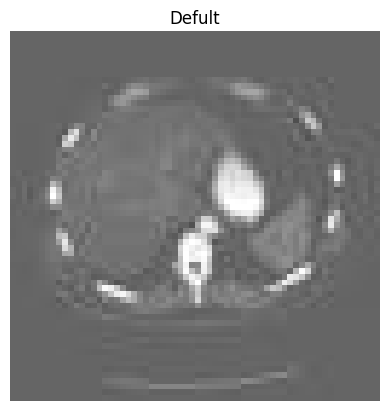

In [62]:
image_path = '/content/dataset/AbdomenCT/000011.jpeg'

image = cv2.imread(image_path)
plt.imshow(image)
plt.title('Defult')
plt.axis("off")
plt.show()

(-0.5, 511.5, 511.5, -0.5)

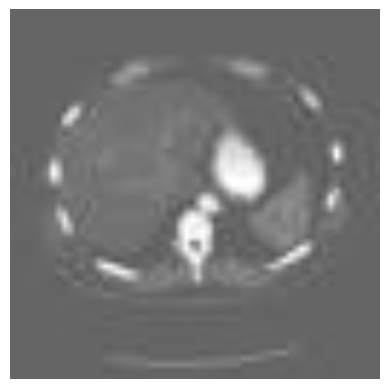

In [53]:
image = cv2.imread(image_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# kernel = np.array([
#     [-1, -1, -1, -1, -1],
#     [-1, 1, 1, 1, -1],
#     [-1, 1, 9, 1, -1],
#     [-1, 1, 1, 1, -1],
#     [-1, -1, -1, -1, -1]
# ]) / 4.0

# filtered = cv2.filter2D(gray, -1, kernel)
resized_image = cv2.resize(image, (512, 512))
final_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

plt.imshow(resized_image.astype("uint8"))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

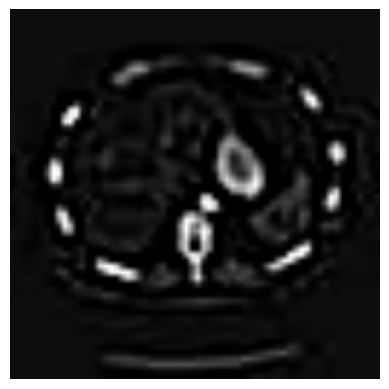

In [63]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 1, 1, -1],
    [-1, 1, 8.5, 1, -1],
    [-1, 1, 1, 1, -1],
    [-1, -1, -1, -1, -1]
]) / 4.0

filtered = cv2.filter2D(gray, -1, kernel)
resized_image = cv2.resize(filtered, (224, 224))
final_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

plt.imshow(final_image.astype("uint8"))
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

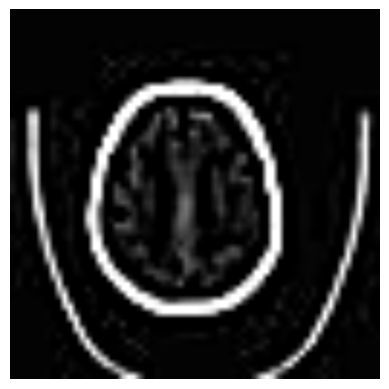

In [59]:
image_path = '/content/dataset/HeadCT/000010.jpeg'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, 1, 1, -1],
    [-1, 1, 8.5, 1, -1],
    [-1, 1, 1, 1, -1],
    [-1, -1, -1, -1, -1]
]) / 4.0

filtered = cv2.filter2D(gray, -1, kernel)
resized_image = cv2.resize(filtered, (512, 512))
final_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

plt.imshow(final_image.astype("uint8"))
plt.axis("off")

In [160]:
data_dir = pathlib.Path("dataset")
img_height = 224
img_width = 224
train_generator = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        labels='inferred',
                                        label_mode='categorical',
                                        image_size=(img_height, img_width),
                                        validation_split=0.1,
                                        subset='training')

validation_generator = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      labels='inferred',
                                      label_mode='categorical',
                                      image_size=(img_height, img_width),
                                      validation_split=0.1,
                                      subset='validation',)

Found 58954 files belonging to 6 classes.
Using 53059 files for training.
Found 58954 files belonging to 6 classes.
Using 5895 files for validation.


In [154]:
train_generator

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [155]:
validation_generator

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

My Model

In [180]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Conv2D(input_shape = (224,224,3),kernel_size=(3,3),
                                activation='relu',filters = 32,strides=1))
myModel.add(keras.layers.MaxPooling2D((2,2)))
myModel.add(keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters = 64,
                             strides=1))
myModel.add(keras.layers.MaxPooling2D((2,2)))
myModel.add(keras.layers.Conv2D(kernel_size=(3,3),activation='relu',filters = 128,
                             strides=1))
myModel.add(keras.layers.MaxPooling2D((2,2)))
myModel.add(keras.layers.Flatten())
myModel.add(keras.layers.Dropout(0.4))
myModel.add(keras.layers.Dense(256,activation='relu',
                             kernel_regularizer=keras.regularizers.l2(0.01)))
myModel.add(keras.layers.Dense(128,activation='relu',
                            kernel_regularizer=keras.regularizers.l2(0.01)))
myModel.add(keras.layers.Dense(64,activation='relu',
                            kernel_regularizer=keras.regularizers.l2(0.01)))
myModel.add(keras.layers.Dense(6,activation='softmax'))

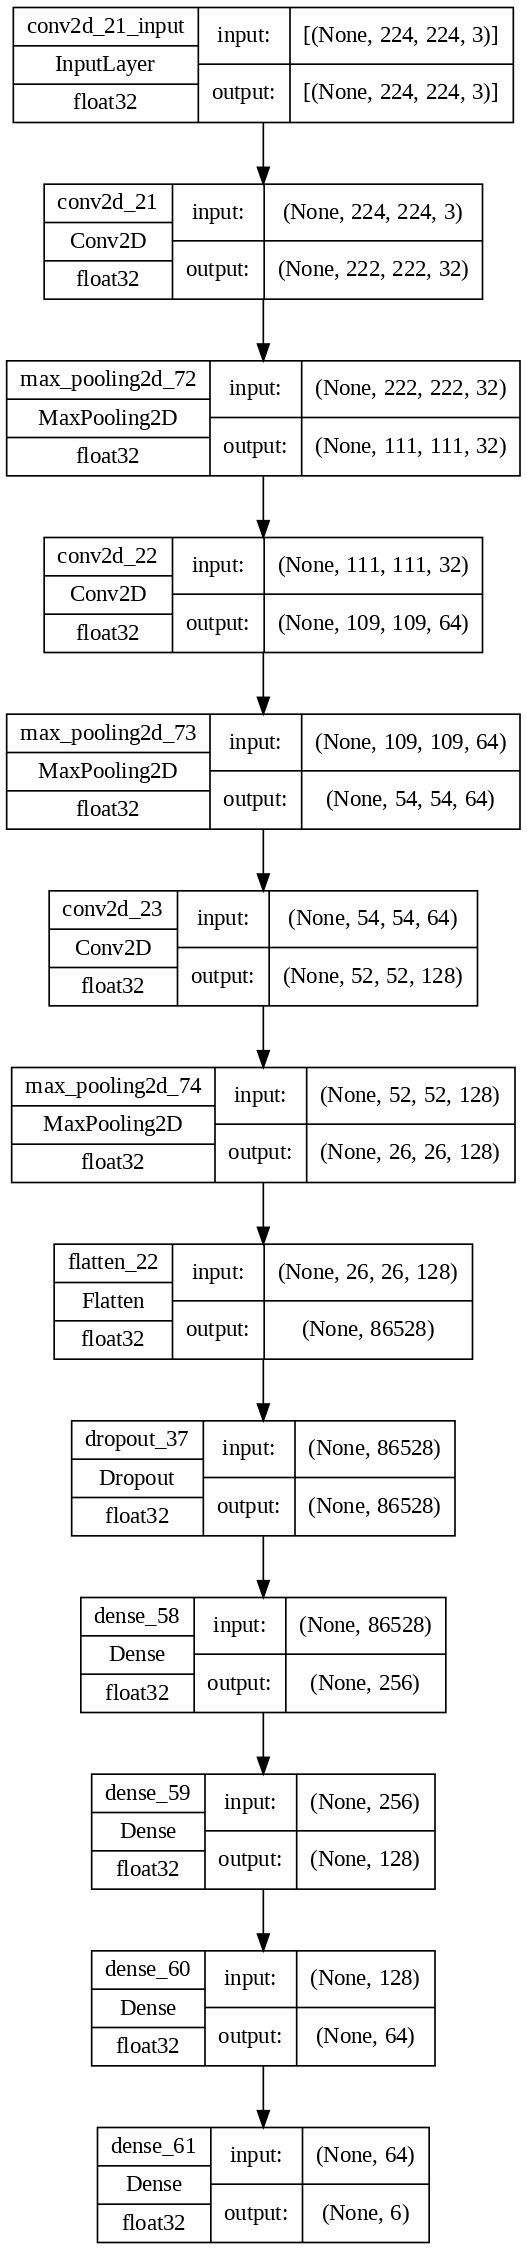

In [181]:
tf.keras.utils.plot_model(myModel, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [182]:
checkpoint_cb =ModelCheckpoint("myModel.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
myModel.compile(optimizer ='adam',loss='categorical_crossentropy', metrics=['accuracy'])
hist=myModel.fit(train_generator,epochs=1,validation_data=validation_generator,callbacks=[checkpoint_cb,early_stopping_cb])

1659/1659 [==============================] - ETA: 0s - loss: 4.0063 - accuracy: 0.9507

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1659/1659 [==============================] - 106s 62ms/step - loss: 4.0063 - accuracy: 0.9507 - val_loss: 1.1536 - val_accuracy: 0.9861


ResNet50V2

In [158]:
from tensorflow.keras.applications import ResNet50V2

base = ResNet50V2(weights = "imagenet", include_top = False, input_shape=(224,224,3))
for layer in base.layers:
    layer.trainable = False

model = keras.models.Sequential()
model.add(base)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(6, activation = "softmax"))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 batch_normalization_14 (Ba  (None, 7, 7, 2048)        8192      
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_21 (Flatten)        (None, 100352)            0         
                                                                 
 dense_56 (Dense)            (None, 128)               12845184  
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                     

In [162]:
checkpoint_cb =ModelCheckpoint("baseModel.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam',loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(train_generator,epochs=1,validation_data=validation_generator,callbacks=[checkpoint_cb,early_stopping_cb])

1659/1659 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9721

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1659/1659 [==============================] - 181s 106ms/step - loss: 0.2221 - accuracy: 0.9721 - val_loss: 0.0575 - val_accuracy: 0.9978


In [179]:
# from tensorflow.keras.preprocessing import image

# def predict_image(model, image_path):
#     img = cv2.imread(image_path)
#     img = cv2.resize(img, (224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = img_array / 255.0
#     predictions = model.predict(img_array)

#     class_names = ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
#     predicted_class = class_names[np.argmax(predictions)]

#     print(f'The predicted class is: {predicted_class}')
#     print(f'Predicted probabilities: {predictions}')

# image_path = '/content/dataset/HeadCT/000011.jpeg'
# predict_image(model, image_path)